In [1]:
import glob
import json

import pandas as pd
import seaborn as sns

In [94]:
DATA_PATH: str = './annotated'
OUT_PATH: str = './figures'
N: int = 100  # number of samples per language

LANG_ORDER: list = ['Dutch', 'German', 'English']

In [95]:
dataset: pd.DataFrame = (
    pd.concat([
        pd.json_normalize(json.load(open(file, 'r')))
        for file in glob.glob(f'{DATA_PATH}/*.json')
    ])
    .set_index('id')
    .astype({
        'persona': 'category', 'model': 'category',
        'topic': 'category', 'platform': 'category',
        'language': 'category'
    })
    .dropna()
    .replace({
        'mistralai/Mistral-7B-Instruct-v0.2': 'Mistral-7B-Instruct'
    })
)
display(f'Number of annotated samples {len(dataset)}')
dataset

/var/folders/7n/1kfsdp892135fl2ydt6ttrw00000gn/T/ipykernel_6672/944009306.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pd.concat([


'Number of annotated samples 634'

,persona,model,topic,platform,language,text,annotation.topic,annotation.persona,annotation.authenticity
id,,,,,,,,,
a999eba1ff9e79165e49e711c4de1e5e0000b5db569a6252,conservative,gpt-3.5-turbo,Environment,Reddit,German,"Energiewende ist teuer, aber ist notwendig für...",5.0,1.0,3.0
2875647939a4564b50d80a01571d244174f2ff98f7f59ac1,conservative,Mistral-7B-Instruct,Healthcare,Twitter,German,Für eine effiziente Gesundheitsversorgung ist ...,5.0,3.0,3.0
fd73ce12e8779294c23b6d6eac658999ca1a7b0d02410528,alt_right,Mistral-7B-Instruct,Environment,Twitter,German,"ist wichtig, aber nicht alles. Politische Korr...",2.0,5.0,4.0
3232ddbec21904e1122c828e20838a13cc8146faa0e0f300,liberal,gpt-3.5-turbo,Environment,Twitter,German,Zeit für eine nachhaltige Energiezukunft! Lass...,5.0,5.0,4.0
cd92c2fd1e9411a5842423bdc3f64aed5a6a9090a2017f51,conservative,Mistral-7B-Instruct,Covid-19,Twitter,German,💉 Impfstoffe gegen Covid-19 wichtig für Gesund...,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...
fd35e7c77317452180d441f04e6488ef461bfd348e5c51cb,alt_right,gpt-3.5-turbo,Environment,Twitter,English,Recycling? More like virtue signaling for the ...,5.0,5.0,5.0
2ddd1ea0908ba925abe5d9f429eeb86f41d240341030d748,liberal,gpt-3.5-turbo,Healthcare,Twitter,English,Everyone deserves access to affordable healthc...,5.0,5.0,4.0
49e4bf698ad21e8596f49343b5c51384b544b65285894668,conservative,gpt-3.5-turbo,Healthcare,Twitter,English,Thrilled to see ongoing advancements in medica...,5.0,3.0,2.0


In [96]:
stratified_dataset = (
    dataset
    .groupby(
        'language', 
        group_keys=False,
        observed=True
    )
    .sample(n=N)
)
display(f'Length of stratified (over languages) dataset {len(stratified_dataset)}')
stratified_dataset

'Length of stratified (over languages) dataset 300'

,persona,model,topic,platform,language,text,annotation.topic,annotation.persona,annotation.authenticity
id,,,,,,,,,
338ca7dca90355ea127111dd9866514f43d2bae4b4fdc2a0,alt_right,gpt-3.5-turbo,Covid-19,Reddit,Dutch,Ik ben helemaal klaar met al die overheidsregu...,5.0,5.0,2.0
5d8994b9ddd270fcb936db910622883eb6008bb84e949f07,liberal,Mistral-7B-Instruct,Healthcare,Reddit,Dutch,Beleid moet meer investeren in preventie en sc...,5.0,3.0,2.0
b462171bde36a48a9a567e8814fca6af41d4640c0cc3994b,alt_right,gpt-3.5-turbo,Environment,Twitter,Dutch,"Hoewel de mainstream media anders beweert, gel...",5.0,2.0,2.0
4d9b0e159491e4ad39f7ba0fe39234a126223aa9aa4b2d3c,liberal,Mistral-7B-Instruct,Covid-19,Twitter,Dutch,💉 Vaccins zijn de weg naar een veiligere toeko...,5.0,5.0,3.0
ba6d48ab1ce9c69bd00b081d49a9bd38407fd2ac49b79603,liberal,gpt-3.5-turbo,Economy,Reddit,Dutch,Wat een interessante discussie over inflatie i...,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...
c6884a327129e441693e7e4be9926bdc89ae8f0aca8573c7,conservative,Mistral-7B-Instruct,Environment,Reddit,German,Reduzieren Sie Abfälle und unterstützen Sie di...,5.0,1.0,4.0
e9fc6392df683d4a0e455069611418f73cd9f81c66ec7639,liberal,Mistral-7B-Instruct,Economy,Reddit,German,Steuern wichtig für eine gesunde Wirtschaft. F...,5.0,4.0,5.0
96b72078bdd7519393366ae38f7db2d0408e99bbbabe10c2,alt_right,gpt-3.5-turbo,Covid-19,Reddit,German,Vorsicht vor den Lügen der Mainstream-Medien! ...,5.0,5.0,5.0


In [97]:
display('Base statistics grouped by languages.') 
(
    stratified_dataset
    .groupby('language', observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean', 'std'])]
    .T
    .reindex(columns=LANG_ORDER)
)

'Base statistics grouped by languages.'

language                         Dutch    German   English
annotation.topic        mean  4.820000  4.680000  4.880000
                        std   0.609355  0.839432  0.408990
annotation.persona      mean  3.560000  4.000000  4.470000
                        std   1.047556  1.230915  0.822106
annotation.authenticity mean  2.550000  4.130000  4.050000
                        std   0.936089  0.836720  1.018763

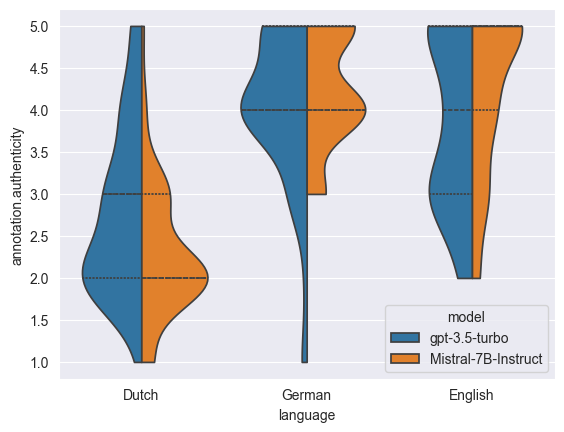

In [171]:
ax = sns.violinplot(
    data=stratified_dataset,
    x="language",
    y="annotation.authenticity",
    hue="model",
    inner="quart",
    split=True,
    order=LANG_ORDER,
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.language.model.auth.pdf', format="pdf", bbox_inches="tight") 

In [99]:
(
    stratified_dataset
    .groupby('model', observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean', 'std'])]
    .T
)

model                         gpt-3.5-turbo  Mistral-7B-Instruct
annotation.topic        mean       4.738255             4.847682
                        std        0.747934             0.525970
annotation.persona      mean       4.067114             3.953642
                        std        1.112973             1.103556
annotation.authenticity mean       3.557047             3.596026
                        std        1.129354             1.233849

In [120]:
(
    stratified_dataset
    .groupby(['persona', 'model'], observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean'])]
    .T
    .droplevel(level=1)
    .T
)

annotation.topic  annotation.persona  \
persona      model                                                       
alt_right    gpt-3.5-turbo                4.568182            3.750000   
             Mistral-7B-Instruct          4.903846            3.961538   
conservative gpt-3.5-turbo                4.769231            3.769231   
             Mistral-7B-Instruct          4.777778            3.488889   
liberal      gpt-3.5-turbo                4.849057            4.622642   
             Mistral-7B-Instruct          4.851852            4.333333   

                                  annotation.authenticity  
persona      model                                         
alt_right    gpt-3.5-turbo                       3.409091  
             Mistral-7B-Instruct                 3.884615  
conservative gpt-3.5-turbo                       3.423077  
             Mistral-7B-Instruct                 3.222222  
liberal      gpt-3.5-turbo                       3.811321  
             Mistral-7B-Instruct                 3.629630

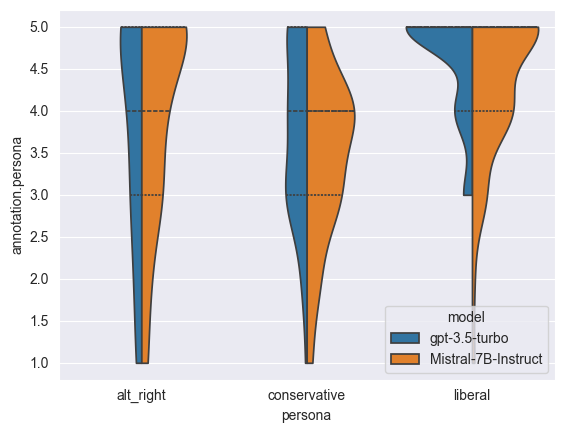

In [170]:
ax = sns.violinplot(
    data=stratified_dataset, 
    x="persona", 
    y="annotation.persona", 
    hue="model", 
    split=True, 
    inner="quart",
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.persona.model.auth.pdf', format="pdf", bbox_inches="tight") 

In [122]:
(
    stratified_dataset
    .groupby(['topic', 'model'], observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean'])]
    .T
    .droplevel(level=1)
    .T
)

annotation.topic  annotation.persona  \
topic       model                                                       
Covid-19    gpt-3.5-turbo                4.916667            4.333333   
            Mistral-7B-Instruct          4.888889            4.027778   
Economy     gpt-3.5-turbo                4.970588            4.147059   
            Mistral-7B-Instruct          5.000000            4.500000   
Environment gpt-3.5-turbo                4.736842            3.947368   
            Mistral-7B-Instruct          4.944444            3.638889   
Healthcare  gpt-3.5-turbo                4.730769            3.692308   
            Mistral-7B-Instruct          4.846154            3.846154   
Ukraine War gpt-3.5-turbo                4.323529            4.058824   
            Mistral-7B-Instruct          4.480000            3.800000   

                                 annotation.authenticity  
topic       model                                         
Covid-19    gpt-3.5-turbo                       3.694444  
            Mistral-7B-Instruct                 3.472222  
Economy     gpt-3.5-turbo                       3.470588  
            Mistral-7B-Instruct                 4.000000  
Environment gpt-3.5-turbo                       4.052632  
            Mistral-7B-Instruct                 3.694444  
Healthcare  gpt-3.5-turbo                       3.192308  
            Mistral-7B-Instruct                 3.269231  
Ukraine War gpt-3.5-turbo                       3.500000  
            Mistral-7B-Instruct                 3.520000

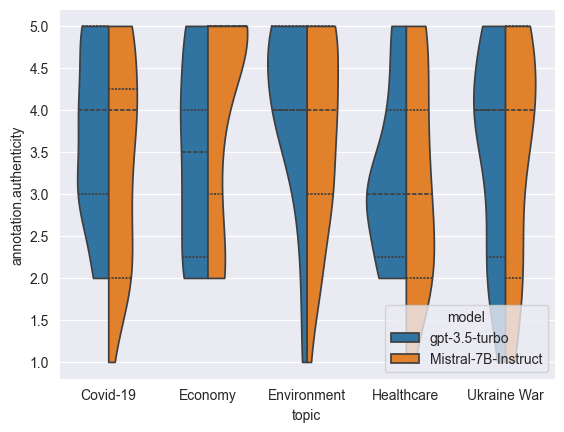

In [169]:
ax = sns.violinplot(
    data=stratified_dataset, 
    x="topic", 
    y="annotation.authenticity", 
    hue="model", 
    split=True, 
    inner="quart",
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.topic.model.auth.pdf', format="pdf", bbox_inches="tight") 

In [129]:
(
    stratified_dataset
    .groupby(['platform', 'model'], observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean'])]
    .T
    .droplevel(level=1)
    .T
)

annotation.topic  annotation.persona  \
platform model                                                       
Reddit   gpt-3.5-turbo                4.821429            4.107143   
         Mistral-7B-Instruct          4.828571            3.714286   
Twitter  gpt-3.5-turbo                4.630769            4.015385   
         Mistral-7B-Instruct          4.864198            4.160494   

                              annotation.authenticity  
platform model                                         
Reddit   gpt-3.5-turbo                       3.702381  
         Mistral-7B-Instruct                 3.471429  
Twitter  gpt-3.5-turbo                       3.369231  
         Mistral-7B-Instruct                 3.703704

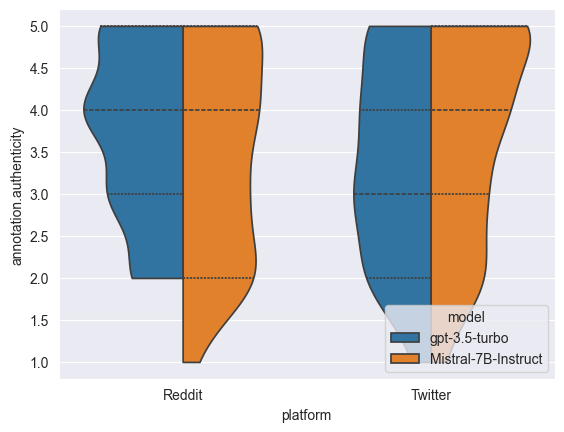

In [168]:
ax = sns.violinplot(
    data=stratified_dataset, 
    x="platform", 
    y="annotation.authenticity", 
    hue="model", 
    split=True, 
    inner="quart", 
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.platform.model.auth.pdf', format="pdf", bbox_inches="tight") 

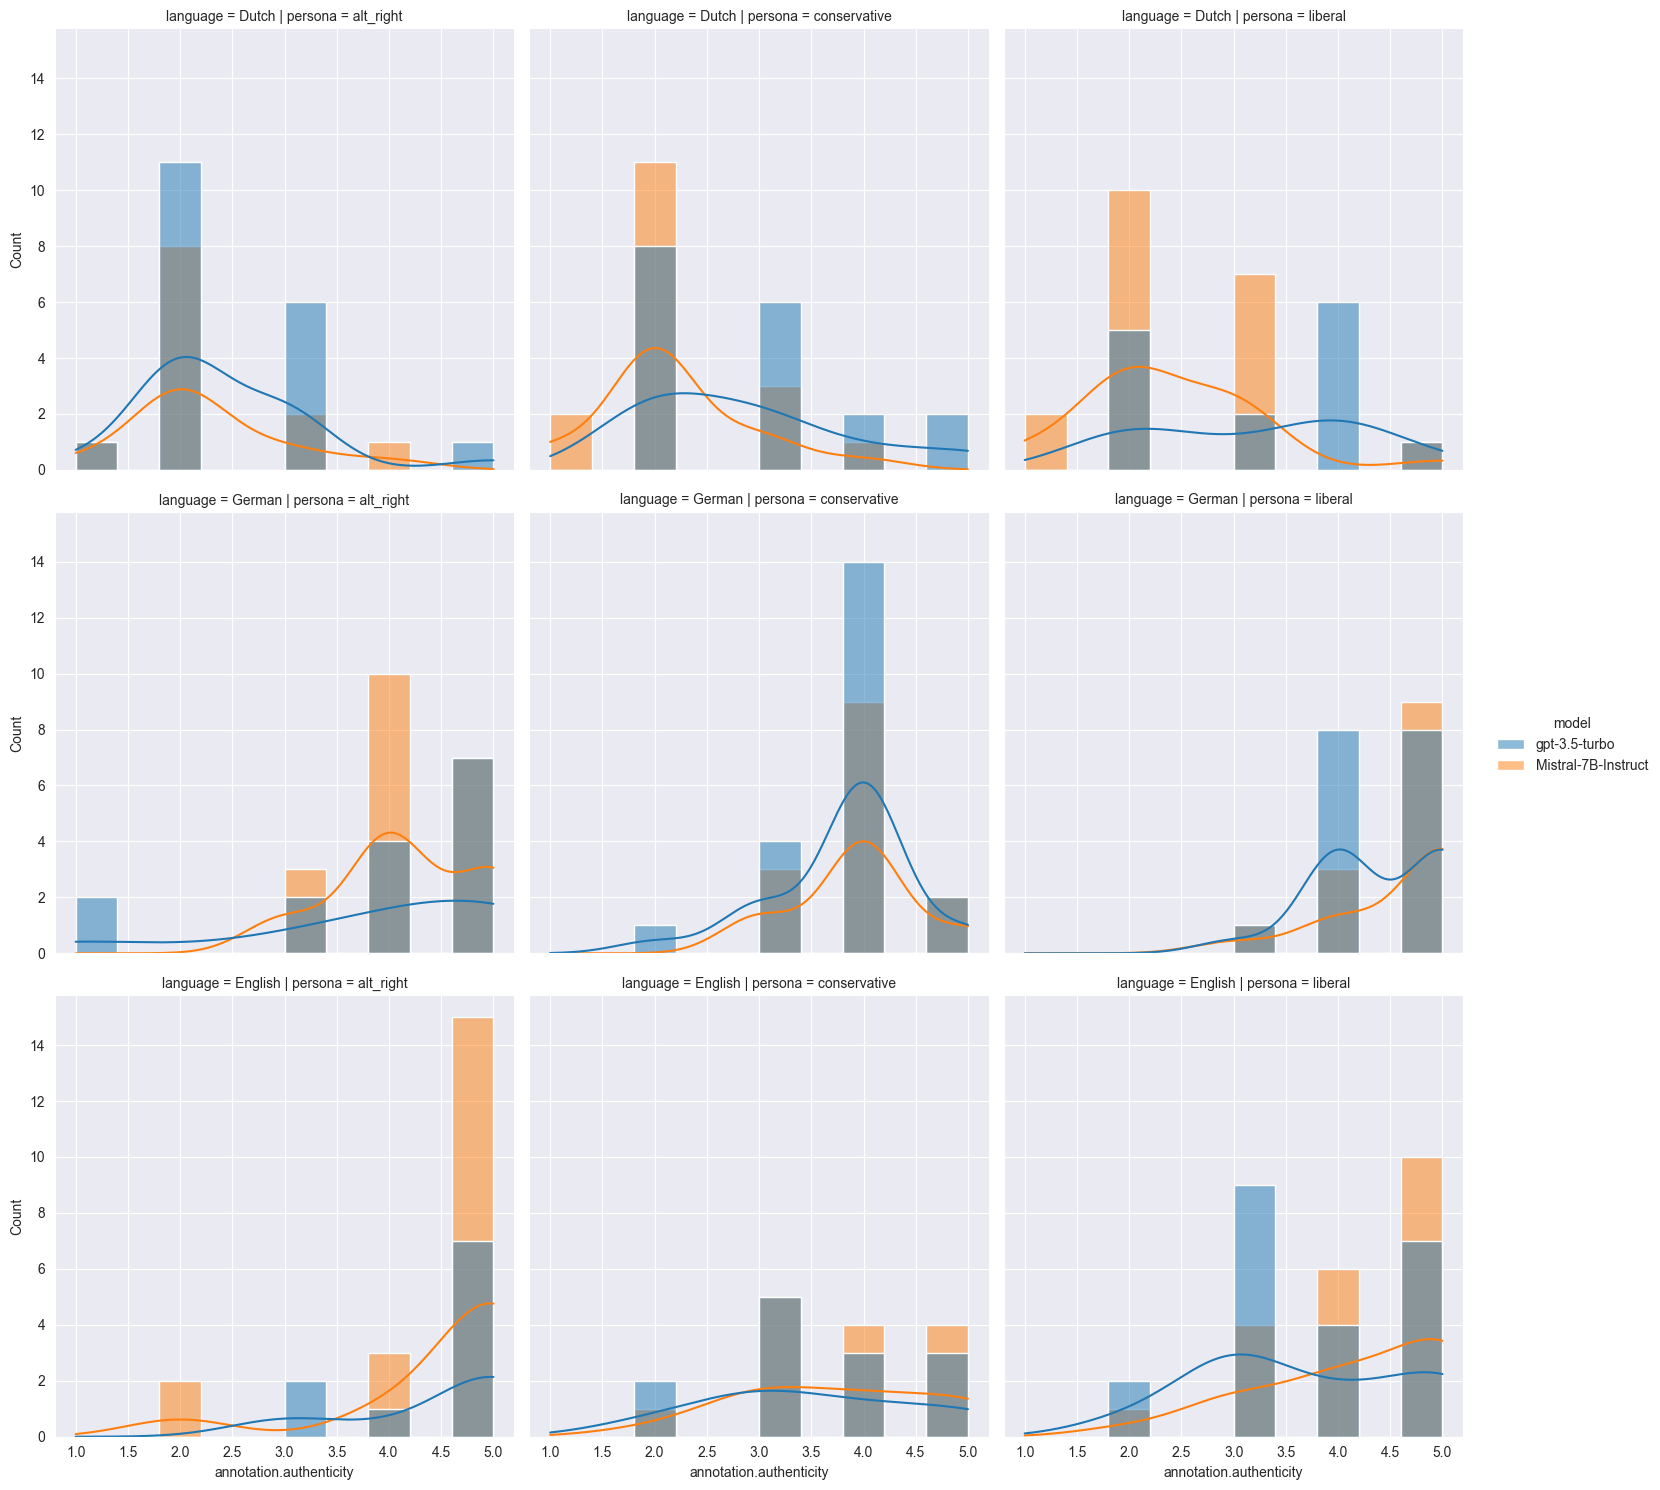

In [142]:
ax = sns.displot(
    stratified_dataset, 
    x="annotation.authenticity", 
    col="persona", 
    row="language", 
    hue="model", 
    kde=True,
    row_order=LANG_ORDER,
)
ax.savefig(f'{OUT_PATH}/dist.persona.language.model.auth.pdf', format="pdf", bbox_inches="tight") 

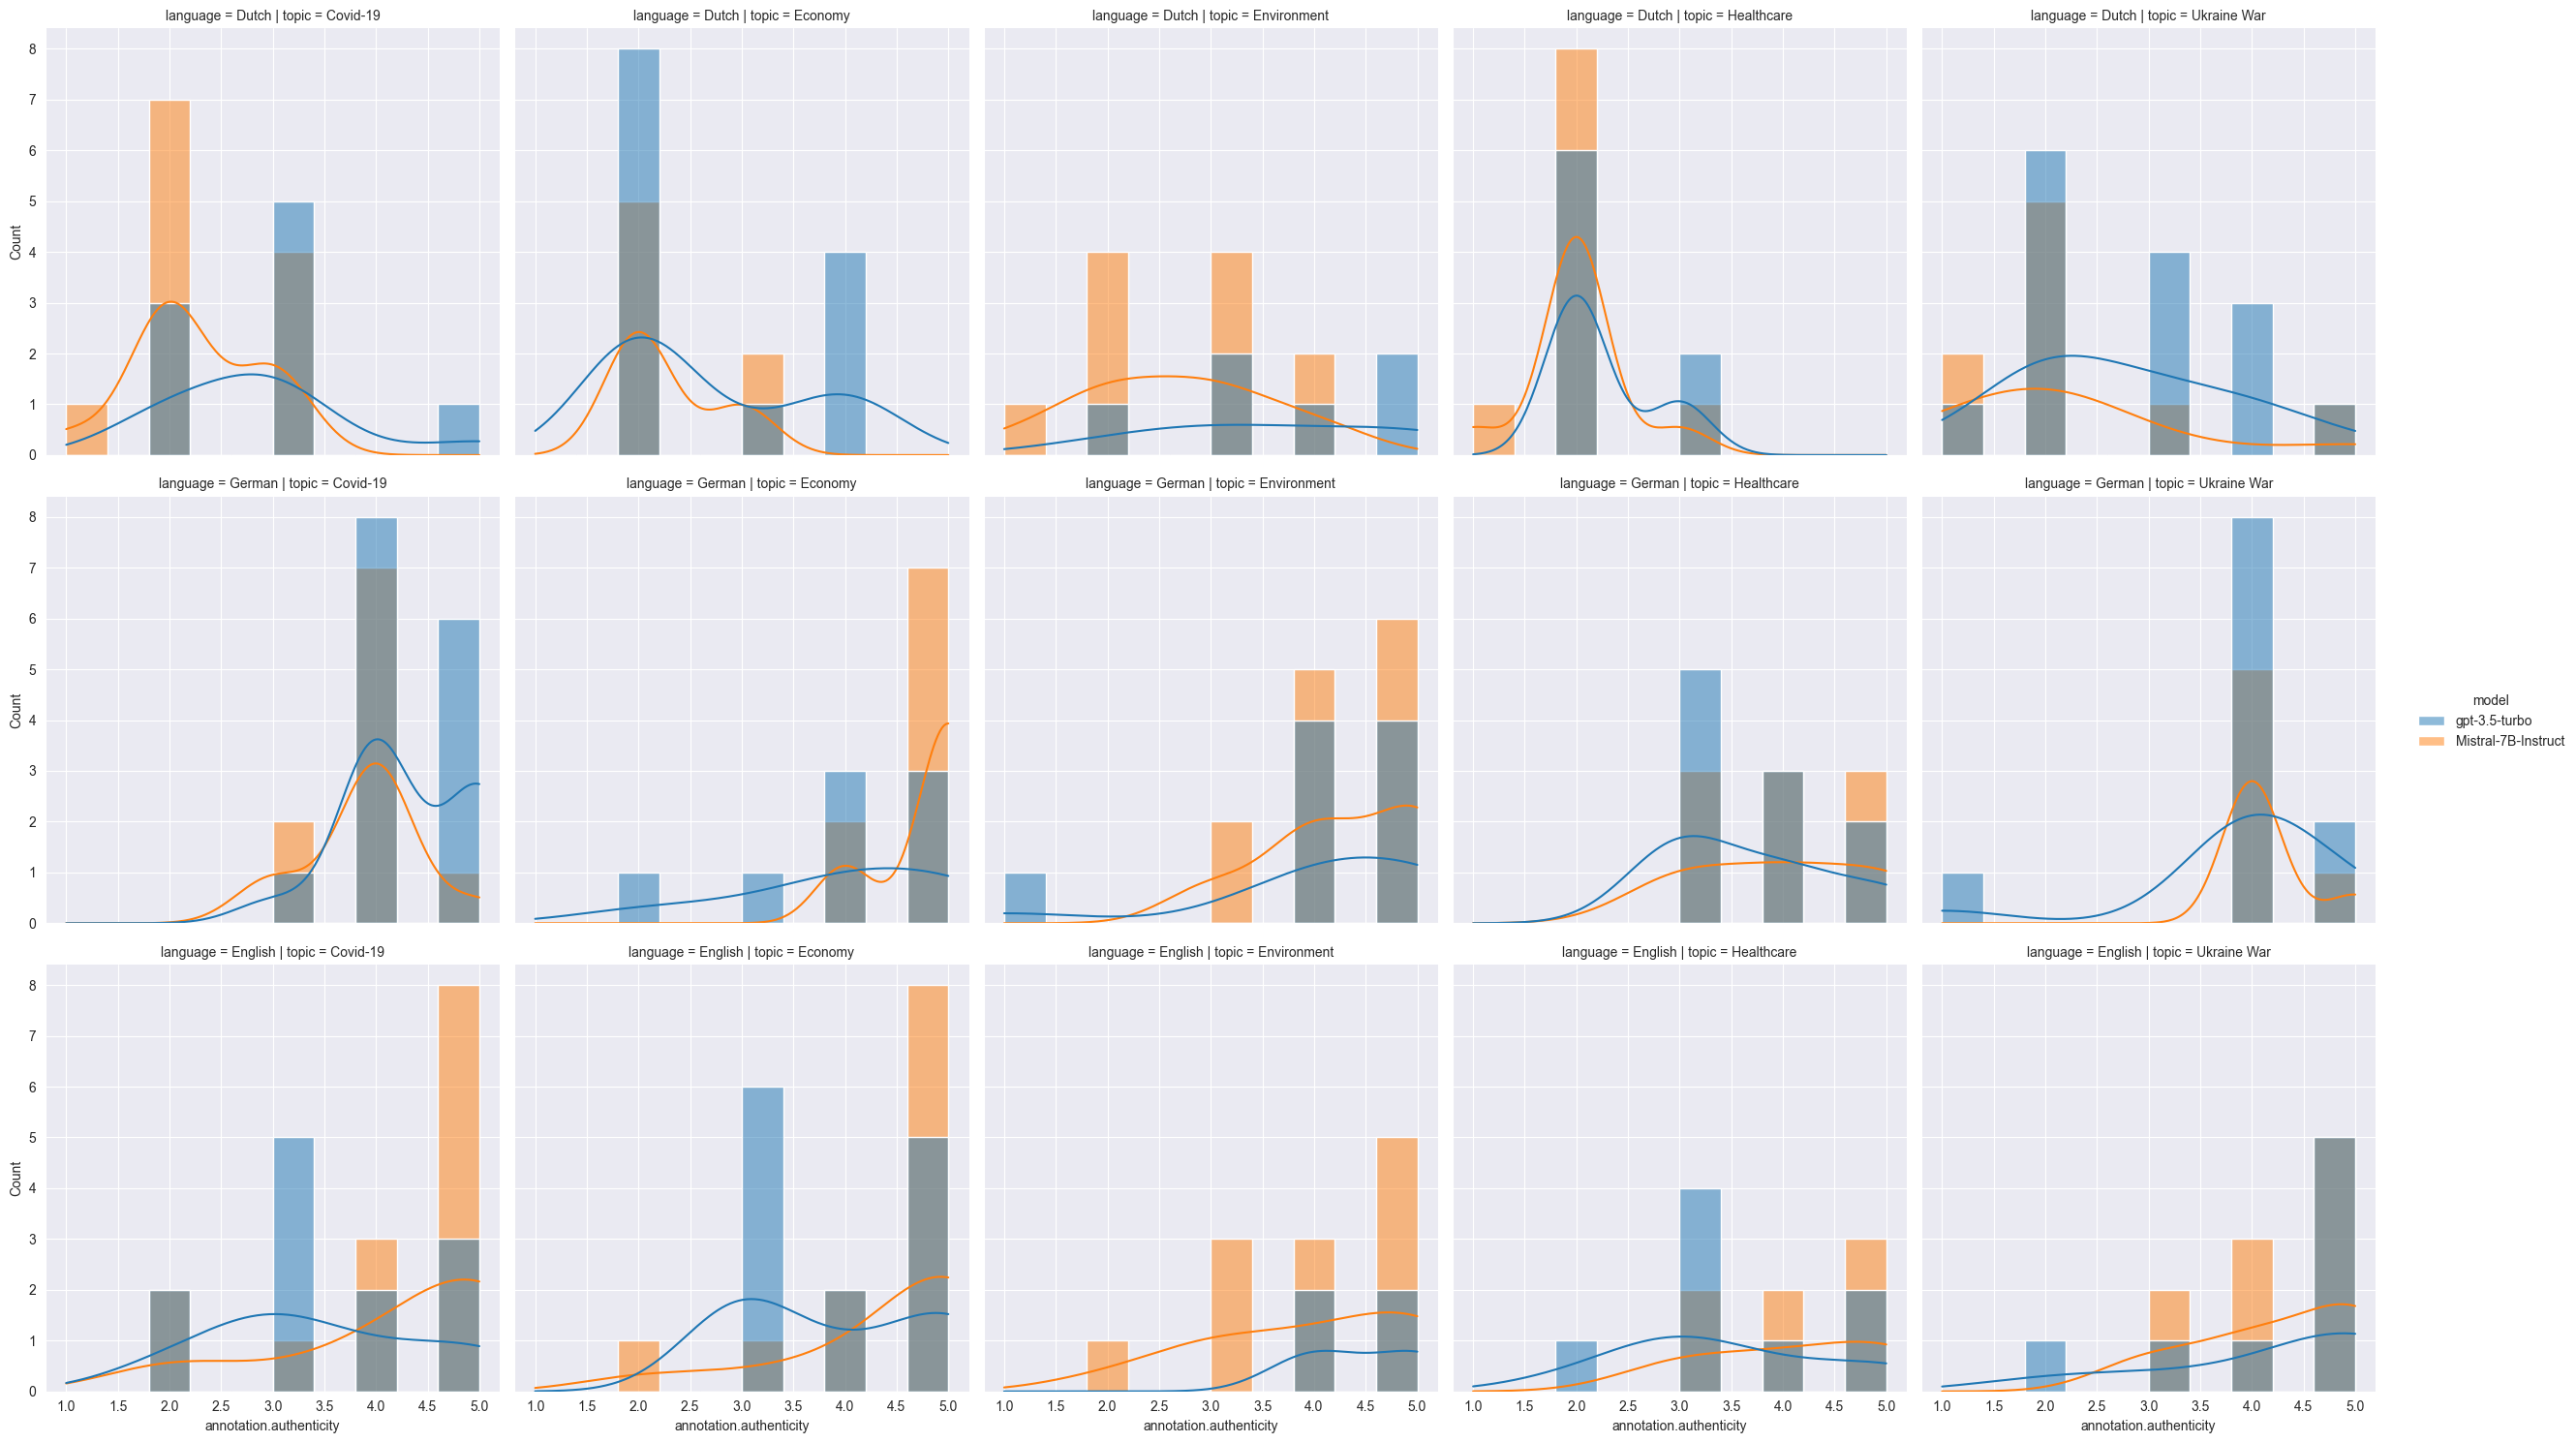

In [143]:
ax = sns.displot(
    stratified_dataset, 
    x="annotation.authenticity", 
    col="topic", 
    row="language", 
    hue="model", 
    kde=True,
    row_order=LANG_ORDER,
)
ax.savefig(f'{OUT_PATH}/dist.topic.language.model.auth.pdf', format="pdf", bbox_inches="tight") 

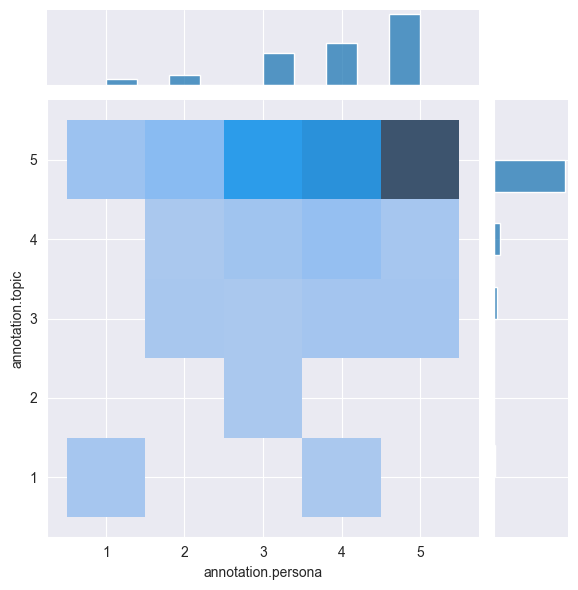

In [207]:
ax = sns.jointplot(
    data=stratified_dataset, 
    x="annotation.persona", 
    y="annotation.topic", 
    discrete=True, 
    kind="hist",
)
ax.savefig(f'{OUT_PATH}/joint.persona.topic.pdf', format="pdf", bbox_inches="tight") 